In [3]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from graspologic.align import SeedlessProcrustes

In [4]:
n, d = 250, 2

In [5]:
# this notebook has a very simple example of using SeedlessProcrustes
# we generate a sample from MVN, stack it with itself and then orthogonally transform.

In [6]:
def test_matching_datasets(seed=314, n=250, d=2):
    np.random.seed(seed)
    mean = np.ones(d) * 5
    cov = np.ones((d,d))*0.02 + np.eye(d)*0.8
    X = stats.multivariate_normal.rvs(mean, cov, n)
    Y = np.concatenate([X, X])
    W = stats.ortho_group.rvs(d)
    Y = Y @ W

    aligner = SeedlessProcrustes(init="2d")
    Q = aligner.fit(X, Y).Q_
    return (X, Y, W, Q)

In [7]:
# ideally, we'd want to recover exact W. Sometimes it is possible:
X, Y, W, Q = test_matching_datasets(seed=314, n=n, d=d)
W, Q

(array([[-0.67733529,  0.73567446],
        [ 0.73567446,  0.67733529]]),
 array([[-0.67748985,  0.73553213],
        [ 0.73553213,  0.67748985]]))

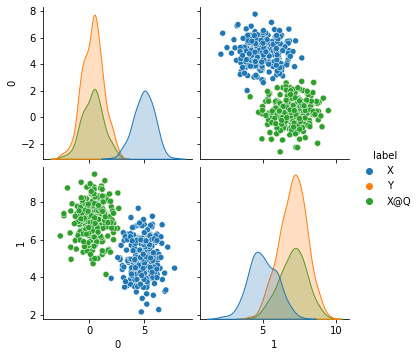

In [8]:
data = np.concatenate([X, Y, X@Q])
data = pd.DataFrame(data)
data["label"] = np.concatenate([['X']*n, ['Y']*n*2, ['X@Q']*n])
fig = sns.pairplot(data, hue='label')


In [9]:
# however, it is important to note that sometimes we get stuck in local minimas
# and even over 2^d different inits, we cannot get to the actual W.
# we do still manage to place the X@Q on top of Y, which is what we really care about.

In [10]:
X, Y, W, Q = test_matching_datasets(seed=1233, n=n, d=d)
W, Q

(array([[ 0.48686936, -0.8734748 ],
        [-0.8734748 , -0.48686936]]),
 array([[-0.88823116, -0.45939679],
        [ 0.45939679, -0.88823116]]))

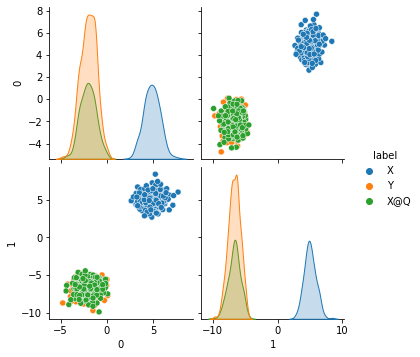

In [11]:
data = np.concatenate([X, Y, X@Q])
data = pd.DataFrame(data)
data["label"] = np.concatenate([['X']*n, ['Y']*n*2, ['X@Q']*n])
fig = sns.pairplot(data, hue='label')